In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import xarray as xr
import numpy as np

import glob
import os

%matplotlib inline

In [17]:
plt.style.use('seaborn-talk')

In [18]:
lat_min=30
lon_min=-90
lat_max=80
lon_max=20

In [19]:
# etopo file
ef = '/home/soontiensn/data/ocn-nav/ETOPO1_Bed_g_gmt4.grd'
etopo = xr.open_dataset(ef)
esel = etopo.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))

In [20]:
stokes = glob.glob(f'data/csv_files/stokes_*')
SVPs = glob.glob(f'data/csv_files/SVP*')
oskers = glob.glob(f'data/csv_files/OSKERS*')
codes= glob.glob(f'data/csv_files/davis*')
spotter = glob.glob(f'data/csv_files/SPOT*')
mets = glob.glob(f'data/MeteoFrance/six_hourly_interp/*.nc')
mets.extend(glob.glob(f'data/MeteoFrance/erddap/*.nc'))

In [21]:
def pretty_map(ax):
    # Add coastlines
    ax.coastlines(linewidth=1)
    # Add gridlines 
    gl = ax.gridlines(linestyle='--',draw_labels={"bottom": "x", "left": "y"},zorder=10)
    ax.add_feature(cfeature.LAND)

In [22]:
def plot_bathymetry(ax, etopo):
    lons = etopo.x.values
    lats = etopo.y.values
    lons, lats = np.meshgrid(lons,lats)
    bathy = etopo.z.values
    levels = [-1000,]
    CS = ax.contour(lons,lats,bathy,levels, transform=ccrs.PlateCarree(),
                    linestyles='solid', linewidth=0.05,colors='lightgrey')

In [23]:
def plot_mets(files, ax):
    count=0
    for f in files:
        print(f)
        label='MeteoFrance SVP' if count==0 else '__nolabel'
        d = xr.open_dataset(f)
        x, y = d['longitude'].values[0], d['latitude'].values[0]
        ax.plot(x,y,color='C5', label=label, transform=ccrs.PlateCarree()) 
        count+=1

In [24]:
def plot_spotter(files, ax):
    count=0
    for f in files:
        print(f)
        label='Spotters' if count==0 else '__nolabel'
        d = pd.read_csv(f)
        x, y = d['Longitude (deg)'].values, d['Latitude (deg)'].values
        ax.plot(x,y,color='C0', label=label, transform=ccrs.PlateCarree()) 
        count+=1

In [25]:
def plot_SVPs(files, ax):
    count=0
    for f in files:
        print(f)
        d = pd.read_csv(f)
        x, y = d[' LONGITUDE'].values,d[' LATITUDE'].values
        if count==0:
            ax.plot(x,y,color='C1', label='SVP', transform=ccrs.PlateCarree())
        else:
            ax.plot(x,y,color='C1', label='_nolabel__', transform=ccrs.PlateCarree()) 
        count+=1

In [26]:
def plot_davis(files, ax):
    count=0
    for f in files:
        print(f)
        d = pd.read_csv(f)
        x, y = d[' LONGITUDE'].values,d[' LATITUDE'].values
        if count==0:
            ax.plot(x,y,color='C4', label='Code-davis', transform=ccrs.PlateCarree())
        else:
            ax.plot(x,y,color='C4', label='_nolabel__', transform=ccrs.PlateCarree())
        count+=1

In [27]:
def plot_stokes(files, ax):
    count=0
    for f in files:
        print(f)
        d = pd.read_csv(f, na_values=" ")
        d = d[d[' Latitude'].between(-90,90)]  
        x, y = d[' Longitude'].values,d[' Latitude'].values
        if count==0:
            ax.plot(x,y,color='C3', label='stokes',transform=ccrs.PlateCarree())
        else:
            ax.plot(x,y,color='C3', label='_nolabel__',transform=ccrs.PlateCarree())
        count+=1

In [28]:
def plot_oskers(files, ax):
    count=0
    for file in files:
        print(file)
        d = pd.read_csv(file)
        dg = d.groupby('Device')
        for name, g in dg:
            x, y = g['Longitude'].values,g['Latitude'].values
            if count ==0:
                ax.plot(x,y,color='C2', label='Osker', transform=ccrs.PlateCarree())
            else:
                ax.plot(x,y,color='C2', label='__nolabel__',transform=ccrs.PlateCarree())
            count+=1

/home/soontiensn/miniconda-new/envs/develop/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


data/csv_files/SVP_DFONL_2021_02-300534061251630-20230623T132820UTC.csv
data/csv_files/SVP_DFONL_2021_03-300534061252670-20230623T132830UTC.csv
data/csv_files/SVP_DFONL_2021_04-300534061786320-20221013T132259UTC.csv
data/csv_files/SVP_DFONL_Spring2022_01-300534062592980-20230623T132840UTC.csv
data/csv_files/SVP_DFONL_Spring2022_02-300534062597970-20230623T132849UTC.csv
data/csv_files/SVP_DFONL_2021_01-300534061250660-20230623T132809UTC.csv
data/csv_files/stokes_DFONL_Spring2022_02-300434069506700-20221013T140340UTC.csv
data/csv_files/stokes_DFONL_2021_01-300434065180430-20221013T132212UTC.csv
data/csv_files/stokes_DFONL_Spring2022_06-300434066140350-20221013T140347UTC.csv
data/csv_files/stokes_DFONL_2021_03-300434065183420-20221013T132214UTC.csv
data/csv_files/stokes_DFONL_2021_04-300434065185400-20221013T132216UTC.csv
data/csv_files/stokes_DFONL_Spring2022_04-300434069604340-20221013T140346UTC.csv
data/csv_files/stokes_DFONL_Spring2022_01-300434069606520-20221013T140339UTC.csv
data/cs

/tmp/ipykernel_2022775/2785679015.py:10: DtypeWarning: Columns (381) have mixed types.Specify dtype option on import or set low_memory=False.
  plot_spotter(spotter,ax)


data/csv_files/SPOT-1017_2021-12-06_2023-06-23_download.csv


/tmp/ipykernel_2022775/2785679015.py:10: DtypeWarning: Columns (5,6,7,8,9,10,11,365,366,367,380,381) have mixed types.Specify dtype option on import or set low_memory=False.
  plot_spotter(spotter,ax)


data/MeteoFrance/six_hourly_interp/drifter_300234065713240.nc
data/MeteoFrance/six_hourly_interp/drifter_300534062027990.nc
data/MeteoFrance/six_hourly_interp/drifter_300234065713220.nc
data/MeteoFrance/six_hourly_interp/drifter_300534062028730.nc
data/MeteoFrance/six_hourly_interp/drifter_300534062029730.nc
data/MeteoFrance/six_hourly_interp/drifter_300534062028540.nc
data/MeteoFrance/six_hourly_interp/drifter_300534062029710.nc
data/MeteoFrance/six_hourly_interp/drifter_300534062029780.nc
data/MeteoFrance/six_hourly_interp/drifter_300534062029760.nc
data/MeteoFrance/six_hourly_interp/drifter_300534062029800.nc
data/MeteoFrance/six_hourly_interp/drifter_300534062028720.nc
data/MeteoFrance/six_hourly_interp/drifter_300534062028740.nc
data/MeteoFrance/six_hourly_interp/drifter_300534062028700.nc
data/MeteoFrance/erddap/OSMC_30day_4402737_20230621.nc
data/MeteoFrance/erddap/OSMC_30day_4402747_20230621.nc
data/csv_files/OSKERS-SpringAZMP2022-20220526.csv
data/csv_files/OSKERS_2020_TREX.cs

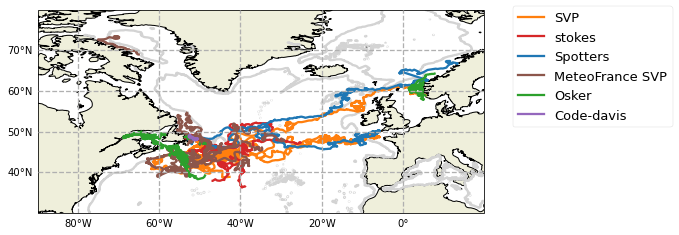

In [32]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

plot_bathymetry(ax,esel)

plot_SVPs(SVPs, ax)

plot_stokes(stokes, ax)

plot_spotter(spotter,ax)
plot_mets(mets, ax)
plot_oskers(oskers, ax)
plot_davis(codes, ax)

pretty_map(ax)
ax.legend(bbox_to_anchor=(1.05, 1.05))


In [33]:
fig.savefig('NLdrifters.png', bbox_inches='tight', dpi=300)